# Model Efficiency Report
Report file: `efficiency_report.json`

This notebook explores model efficiency metrics including accuracy, latency, and derived efficiency scores.


In [11]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

report_path = Path("outputs/LLM-evaluation/efficiency_report.json")
if not report_path.exists():
    report_path = Path("efficiency_report.json")

report = json.loads(report_path.read_text())
df = pd.DataFrame(report['models'])
print(f"Loaded {len(df)} model-condition entries")
print(f"Created: {report['created_at']}")


Loaded 36 model-condition entries
Created: 2026-01-28T22:20:02Z


## Top Models by Efficiency Score


In [12]:
cols = ['model_short', 'condition', 'accuracy', 'latency_mean_ms', 'efficiency_score', 'confidence_score']
display(df[[c for c in cols if c in df.columns]].sort_values('efficiency_score', ascending=False).head(10))


,model_short,condition,accuracy,latency_mean_ms,efficiency_score,confidence_score
8,gpt-5.2,baseline_few_shot,0.755740,1865.478000,0.985877,0.649700
6,gpt-4.1,baseline_few_shot,0.727055,1421.508000,0.962923,0.585940
32,qwen-7b,finetuned_few_shot,0.723247,1075.553529,0.962662,0.828976
2,ds-v3.2,baseline_few_shot,0.735656,2873.420000,0.957004,0.611550
15,llama-8b,finetuned_zero_shot,0.707380,1183.378000,0.946535,0.750800
14,llama-8b,finetuned_few_shot,0.705730,1210.152000,0.944707,0.753640
9,gpt-5.2,baseline_zero_shot,0.711075,2068.180000,0.941457,0.680850
34,qwen-coder-32b,baseline_few_shot,0.702385,1644.630000,0.937309,0.710562
10,llama-70b,baseline_few_shot,0.706963,2205.190000,0.936219,0.576575
7,gpt-4.1,baseline_zero_shot,0.702460,1851.506000,0.935373,0.608260


## Top Most Accurate Models (with Judge Confidence Scores)


In [13]:
# Show top accurate models with confidence scores
acc_cols = ['model_short', 'condition', 'accuracy', 'confidence_score', 'num_seeds', 'latency_mean_ms']
top_accurate = df[[c for c in acc_cols if c in df.columns]].sort_values('accuracy', ascending=False).head(10)
print('\n=== Top 10 Most Accurate Models (with Judge Agreement Confidence) ===')
display(top_accurate)



=== Top 10 Most Accurate Models (with Judge Agreement Confidence) ===


,model_short,condition,accuracy,confidence_score,num_seeds,latency_mean_ms
8,gpt-5.2,baseline_few_shot,0.755740,0.649700,20,1865.478000
2,ds-v3.2,baseline_few_shot,0.735656,0.611550,16,2873.420000
6,gpt-4.1,baseline_few_shot,0.727055,0.585940,20,1421.508000
32,qwen-7b,finetuned_few_shot,0.723247,0.828976,17,1075.553529
9,gpt-5.2,baseline_zero_shot,0.711075,0.680850,16,2068.180000
15,llama-8b,finetuned_zero_shot,0.707380,0.750800,20,1183.378000
10,llama-70b,baseline_few_shot,0.706963,0.576575,16,2205.190000
14,llama-8b,finetuned_few_shot,0.705730,0.753640,20,1210.152000
4,gemma3-27b,baseline_few_shot,0.703894,0.584575,16,34038.322500
7,gpt-4.1,baseline_zero_shot,0.702460,0.608260,20,1851.506000


## Accuracy by Model and Condition


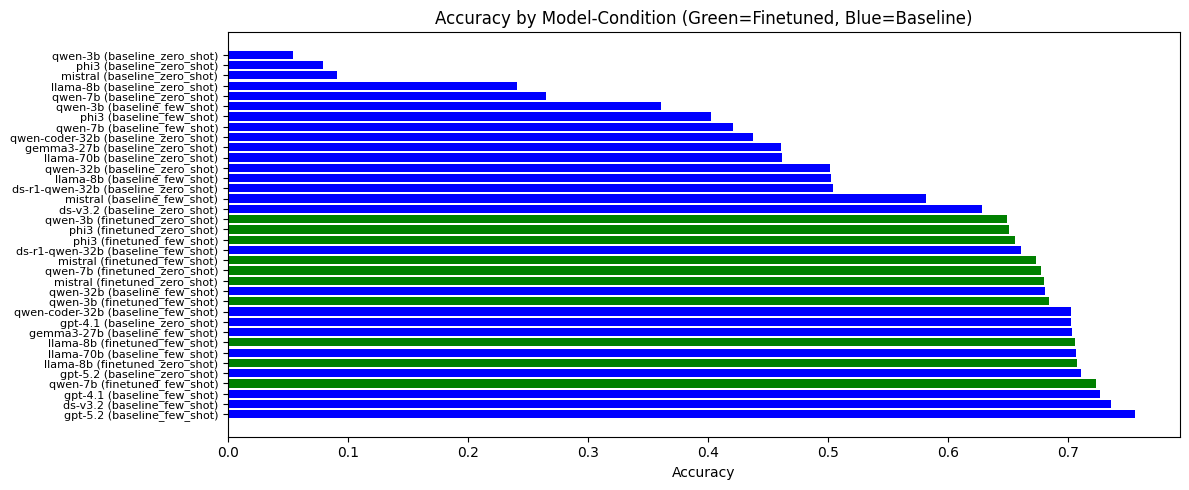

In [14]:
plt.figure(figsize=(12, 5))
df_sorted = df.sort_values('accuracy', ascending=False)
labels = df_sorted['model_short'] + ' (' + df_sorted['condition'].fillna('') + ')'
colors = ['green' if x else 'blue' for x in df_sorted['finetuned']]
plt.barh(range(len(df_sorted)), df_sorted['accuracy'], color=colors)
plt.yticks(range(len(df_sorted)), labels, fontsize=8)
plt.xlabel('Accuracy')
plt.title('Accuracy by Model-Condition (Green=Finetuned, Blue=Baseline)')
plt.tight_layout()
plt.show()


## Latency Distribution


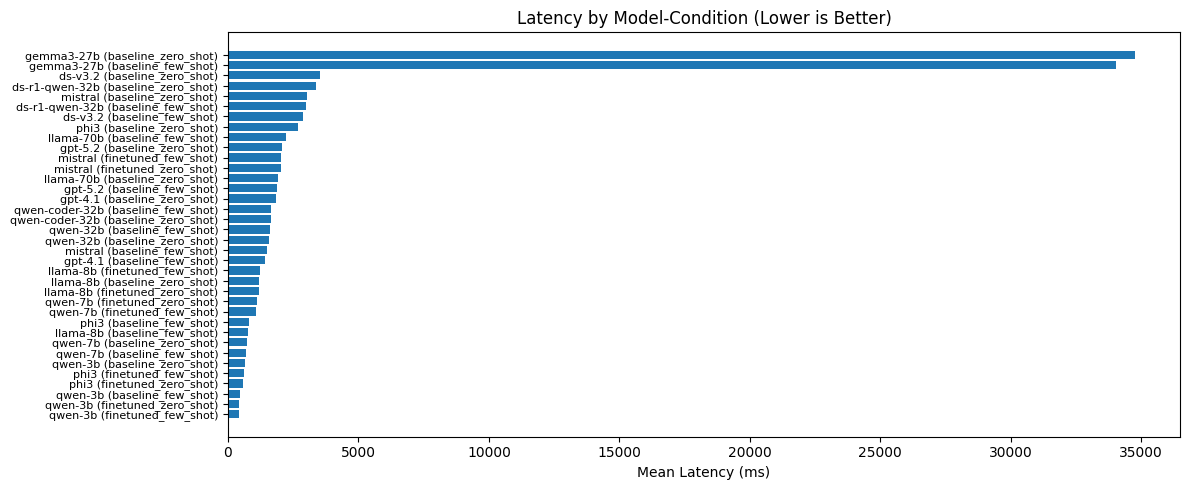

In [15]:
plt.figure(figsize=(12, 5))
df_sorted = df.sort_values('latency_mean_ms', ascending=True)
labels = df_sorted['model_short'] + ' (' + df_sorted['condition'].fillna('') + ')'
plt.barh(range(len(df_sorted)), df_sorted['latency_mean_ms'])
plt.yticks(range(len(df_sorted)), labels, fontsize=8)
plt.xlabel('Mean Latency (ms)')
plt.title('Latency by Model-Condition (Lower is Better)')
plt.tight_layout()
plt.show()


## Efficiency Score Comparison


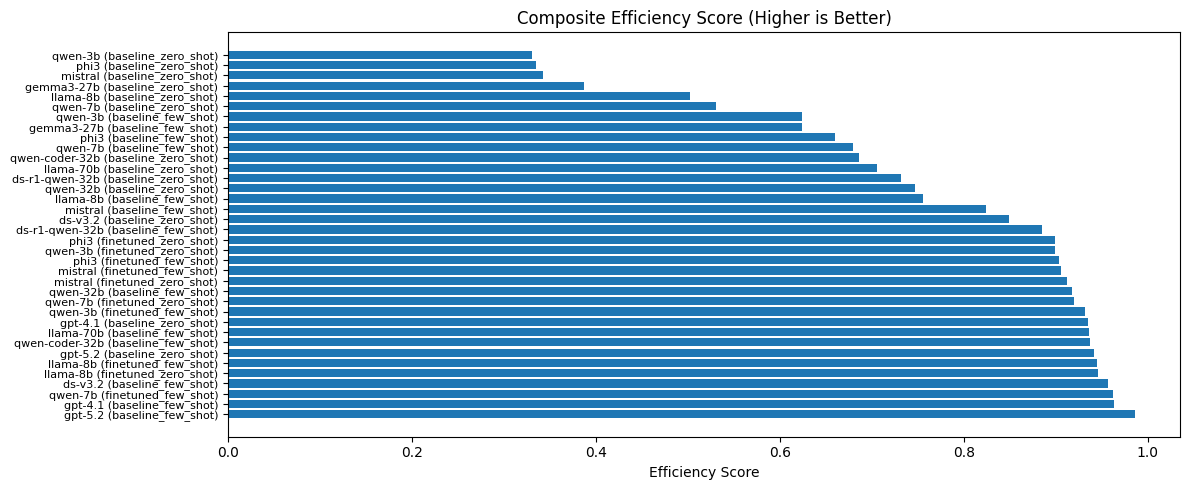

In [16]:
plt.figure(figsize=(12, 5))
df_sorted = df.sort_values('efficiency_score', ascending=False)
labels = df_sorted['model_short'] + ' (' + df_sorted['condition'].fillna('') + ')'
plt.barh(range(len(df_sorted)), df_sorted['efficiency_score'])
plt.yticks(range(len(df_sorted)), labels, fontsize=8)
plt.xlabel('Efficiency Score')
plt.title('Composite Efficiency Score (Higher is Better)')
plt.tight_layout()
plt.show()


## Accuracy vs Latency Scatter


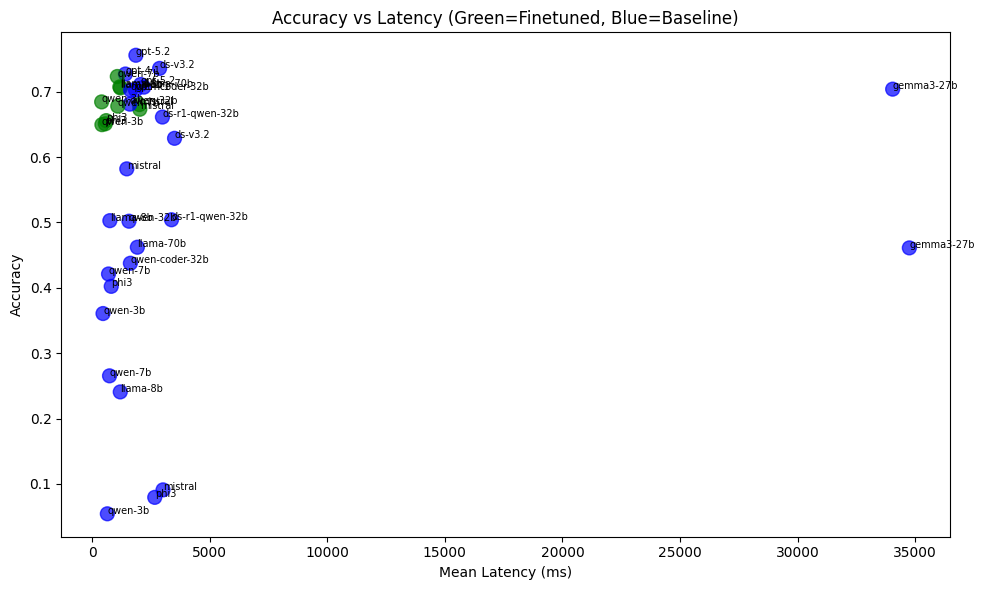

In [17]:
plt.figure(figsize=(10, 6))
colors = ['green' if x else 'blue' for x in df['finetuned']]
plt.scatter(df['latency_mean_ms'], df['accuracy'], c=colors, alpha=0.7, s=100)
for idx, row in df.iterrows():
    plt.annotate(row['model_short'], (row['latency_mean_ms'], row['accuracy']), fontsize=7)
plt.xlabel('Mean Latency (ms)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Latency (Green=Finetuned, Blue=Baseline)')
plt.tight_layout()
plt.show()


## Summary by Condition


In [18]:
by_condition = pd.DataFrame(report['by_condition']).T
display(by_condition)


,count,models,accuracy_mean,latency_mean_ms,efficiency_score_mean
baseline_few_shot,13,"[ds-r1-qwen-32b, ds-v3.2, gemma3-27b, gpt-4.1,...",0.610975,4067.318243,0.82691
baseline_zero_shot,13,"[ds-r1-qwen-32b, ds-v3.2, gemma3-27b, gpt-4.1,...",0.39537,4536.433064,0.617434
finetuned_few_shot,5,"[llama-8b, mistral, phi3, qwen-3b, qwen-7b]",0.688454,1066.231356,0.929684
finetuned_zero_shot,5,"[llama-8b, mistral, phi3, qwen-3b, qwen-7b]",0.673224,1056.137916,0.915307


## Summary by Model


In [19]:
by_model = pd.DataFrame(report['by_model']).T
display(by_model.sort_values('accuracy_best', ascending=False))


,count,conditions,accuracy_mean,accuracy_best,latency_mean_ms,latency_best_ms,efficiency_score_mean,efficiency_score_best
gpt-5.2,2,"[baseline_few_shot, baseline_zero_shot]",0.733407,0.75574,1966.829,1865.478,0.963667,0.985877
ds-v3.2,2,"[baseline_few_shot, baseline_zero_shot]",0.682178,0.735656,3191.184,2873.42,0.903091,0.957004
gpt-4.1,2,"[baseline_few_shot, baseline_zero_shot]",0.714757,0.727055,1636.507,1421.508,0.949148,0.962923
qwen-7b,4,"[baseline_few_shot, baseline_zero_shot, finetu...",0.521928,0.723247,904.604516,702.106923,0.772977,0.962662
llama-8b,4,"[baseline_few_shot, baseline_zero_shot, finetu...",0.539148,0.70738,1088.465417,759.066667,0.78756,0.946535
llama-70b,2,"[baseline_few_shot, baseline_zero_shot]",0.584525,0.706963,2066.61375,1928.0375,0.821193,0.936219
gemma3-27b,2,"[baseline_few_shot, baseline_zero_shot]",0.582484,0.703894,34392.95375,34038.3225,0.505439,0.624275
qwen-coder-32b,2,"[baseline_few_shot, baseline_zero_shot]",0.569977,0.702385,1638.140769,1631.651538,0.811525,0.937309
qwen-3b,4,"[baseline_few_shot, baseline_zero_shot, finetu...",0.437249,0.684419,488.154063,410.66125,0.696538,0.932213
qwen-32b,2,"[baseline_few_shot, baseline_zero_shot]",0.591427,0.680962,1589.592692,1572.697692,0.832383,0.917318


## Rankings Summary


In [20]:
for ranking_name, ranking_data in report['rankings'].items():
    print(f"\n=== {ranking_name.upper()} ===")
    for item in ranking_data:
        print(f"  {item['rank']}. {item['model']} ({item.get('condition', 'N/A')})")



=== FASTEST ===
  1. qwen-3b (finetuned_few_shot)
  2. qwen-3b (finetuned_zero_shot)
  3. qwen-3b (baseline_few_shot)
  4. phi3 (finetuned_zero_shot)
  5. phi3 (finetuned_few_shot)

=== MOST_ACCURATE ===
  1. gpt-5.2 (baseline_few_shot)
  2. ds-v3.2 (baseline_few_shot)
  3. gpt-4.1 (baseline_few_shot)
  4. qwen-7b (finetuned_few_shot)
  5. gpt-5.2 (baseline_zero_shot)

=== BEST_ACCURACY_PER_SECOND ===
  1. qwen-3b (finetuned_few_shot)
  2. qwen-3b (finetuned_zero_shot)
  3. phi3 (finetuned_zero_shot)
  4. phi3 (finetuned_few_shot)
  5. qwen-3b (baseline_few_shot)

=== HIGHEST_THROUGHPUT ===
  1. qwen-3b (finetuned_few_shot)
  2. qwen-3b (finetuned_zero_shot)
  3. qwen-3b (baseline_few_shot)
  4. phi3 (finetuned_zero_shot)
  5. phi3 (finetuned_few_shot)

=== BEST_EFFICIENCY_SCORE ===
  1. gpt-5.2 (baseline_few_shot)
  2. gpt-4.1 (baseline_few_shot)
  3. qwen-7b (finetuned_few_shot)
  4. ds-v3.2 (baseline_few_shot)
  5. llama-8b (finetuned_zero_shot)
